# План:

* ## EDA

* ## Прогнозирование временных рядов

* ## Эластичность на примере

* ## План разработки приложения для ценообразования

# EDA

In [1]:
import pandas as pd
import numpy as np

In [2]:
!ls data/less4/lect/

1510001_agr.csv   1510003_agr.csv   conc_df.csv       sku_dict.csv
1510002_agr.csv   ZX10208_agr.csv   promo_1510002.csv


In [3]:
sku_dict = pd.read_csv('data/less4/lect/sku_dict.csv')
sku_dict.head()

,sku_id,fincode,ui1_code,ui2_code,ui3_code,vendor,brand_code,creation_date,expiration_date
0,43207,A1,A10,A1000,A1000001,A10001,A1000001,2018-01-01,2200-01-01 00:00:00
1,87209,UA,UA1,UA100,UA10000,BLW9FG,484JDFU5,2019-09-05,2200-01-01 00:00:00
2,33513,G9,G91,G9100,G910003,7I77VL,MMC2P4Y3,2018-07-21,2200-01-01 00:00:00
3,47505,AQ,AQ1,AQ100,AQ10000,4HJSP5,8FYENEWM,2018-03-26,2200-01-01 00:00:00
4,53350,6L,6L1,6L100,6L10005,JSOSD5,YTE7JS4H,2018-11-30,2200-01-01 00:00:00


In [4]:
sku_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sku_id           10000 non-null  int64 
 1   fincode          10000 non-null  object
 2   ui1_code         10000 non-null  object
 3   ui2_code         10000 non-null  object
 4   ui3_code         10000 non-null  object
 5   vendor           10000 non-null  object
 6   brand_code       10000 non-null  object
 7   creation_date    10000 non-null  object
 8   expiration_date  10000 non-null  object
dtypes: int64(1), object(8)
memory usage: 703.3+ KB


In [5]:
 for col in sku_dict.columns:
     print(col, sku_dict[f'{col}'].nunique())

sku_id 10000
fincode 31
ui1_code 46
ui2_code 109
ui3_code 804
vendor 25
brand_code 63
creation_date 669
expiration_date 582


In [6]:
sku_dict.fincode.unique()

array(['A1', 'UA', 'G9', 'AQ', '6L', '4W', 'ZR', '15', 'SI', 'BY', '70',
       'BJ', 'RI', 'MB', 'YT', 'K9', 'FE', 'Z8', 'GY', 'M2', 'XG', 'LT',
       'EH', 'ZX', 'H7', '8J', 'AG', 'B1', 'Q5', 'GV', 'B0'], dtype=object)

In [7]:
sku_dict.ui1_code.unique()

array(['A10', 'UA1', 'G91', 'AQ1', '6L1', '4W1', 'ZR1', '151', 'SI1',
       'BY1', '701', 'BJ1', 'RI1', 'MB1', 'YT1', 'K91', 'FE1', 'Z81',
       'GY1', 'M21', 'XG1', 'LT1', 'EH1', 'ZX1', 'H71', '8J1', 'AG1',
       'B11', 'Q51', 'GV1', 'B01', 'EH0', '700', 'M20', 'K90', 'GV0',
       'ZX0', 'B00', 'G90', 'SI0', 'BJ0', 'RI0', 'UA0', 'YT0', 'Z80',
       '4W0'], dtype=object)

In [8]:
sku_dict.ui2_code.unique()

array(['A1000', 'UA100', 'G9100', 'AQ100', '6L100', '4W100', 'ZR101',
       '15100', 'SI100', 'BY100', '70102', 'BJ100', 'G9101', 'RI100',
       'MB100', 'YT102', 'MB101', 'K9102', 'FE100', 'Z8100', 'GY100',
       'UA102', 'M2100', 'XG100', 'LT102', '70101', 'EH100', 'BY101',
       'LT100', 'ZX101', 'H7100', 'XG102', '4W102', 'ZR100', '8J100',
       'AG100', 'AG101', 'K9100', 'Z8101', 'MB102', 'B1100', '6L102',
       'Q5100', 'GV102', 'B0100', 'AQ101', 'GV100', '70100', 'ZR102',
       'UA101', 'GV101', 'M2102', 'LT101', 'GY101', 'YT100', 'AG102',
       'H7101', '6L101', 'SI101', 'B1102', '8J102', 'RI101', 'B1101',
       'BJ102', 'RI102', 'AQ102', 'GY102', 'EH102', 'Q5102', 'EH101',
       '4W101', 'BJ101', 'BY102', 'FE101', 'G9102', 'M2101', '15101',
       'B0102', 'XG101', 'ZX100', 'SI102', 'B0101', '15102', '8J101',
       'K9101', 'Q5101', 'EH000', 'YT101', 'H7102', 'ZX102', 'FE102',
       'Z8102', '70000', 'M2000', 'K9000', 'EH002', 'GV000', 'ZX001',
       'B0000', 'G90

In [9]:
sku_dict.ui3_code.unique()

array(['A1000001', 'UA10000', 'G910003', 'AQ10000', '6L10005', '4W10000',
       'ZR10100', 'AQ10008', '1510004', 'SI10006', 'AQ10005', 'BY10001',
       '7010200', 'AQ10001', 'BJ10001', 'G910100', 'RI10007', 'MB10006',
       'YT10204', 'MB10101', 'K910201', 'FE10002', 'Z810000', 'GY10000',
       'UA10200', 'M210008', 'UA10005', 'XG10002', 'LT10200', 'YT10200',
       '7010100', 'EH10000', 'BY10106', 'LT10007', 'ZX10102', 'H710000',
       'XG10207', 'XG10004', 'BY10000', '4W10207', 'ZR10000', '8J10004',
       'H710005', 'AG10002', 'Z810005', 'AG10100', 'K910005', 'UA10203',
       'EH10007', 'G910007', 'G910000', 'Z810100', '8J10003', 'ZR10005',
       'MB10201', 'LT10000', 'SI10005', 'B110000', '6L10207', 'BJ10000',
       'Q510000', 'GV10200', 'B010000', 'LT10207', 'AQ10105', 'EH10004',
       'M210000', 'GV10000', 'K910200', '7010000', 'ZR10208', 'UA10100',
       'ZX10104', 'GV10100', 'ZR10006', 'XG10000', '7010203', '1510007',
       'AG10000', '1510000', 'RI10000', 'LT10006',

In [10]:
sku_dict.brand_code.value_counts()

brand_code
4WL34OA2    459
8FYENEWM    439
THSTSG81    384
02Q78ADY    304
MMC2P4Y3    294
           ... 
SKXXW8V9     59
JK4UKBI2     52
74CKJ9XQ     51
H1BWFJRN     33
A1000001      1
Name: count, Length: 63, dtype: int64

In [11]:
sku_dict.vendor.value_counts()

vendor
UEYMBB    458
TJYT3A    447
71SM2O    445
7I77VL    440
LDLJFP    435
T9BUA7    434
2CI2A8    432
UH2WWF    430
SJP384    425
AWD3XQ    425
4HJSP5    419
BLW9FG    418
B4TA32    411
3GFIMK    411
SHL570    408
AO59EQ    403
VWHZMG    400
VZ44WY    399
H2OK0Z    399
FI3ASO    398
JSOSD5    398
GVL335    391
4O4WSH    390
CHQKSO    383
A10001      1
Name: count, dtype: int64

In [12]:
sku_dict.groupby(['fincode', 'ui1_code']).sku_id.agg('count').reset_index().sort_values('fincode')

,fincode,ui1_code,sku_id
0,15,151,326
1,4W,4W0,1
2,4W,4W1,345
3,6L,6L1,305
4,70,700,1
5,70,701,305
6,8J,8J1,322
7,A1,A10,1
8,AG,AG1,309
9,AQ,AQ1,347


In [13]:
sku_dict.groupby(['ui1_code', 'ui3_code']).sku_id.agg('count').reset_index().sort_values('ui1_code')

,ui1_code,ui3_code,sku_id
0,151,1510000,123
23,151,1510208,4
22,151,1510207,2
21,151,1510206,2
20,151,1510205,1
...,...,...,...
778,ZX1,ZX10001,11
777,ZX1,ZX10000,112
802,ZX1,ZX10207,1
789,ZX1,ZX10103,1


# ZX10208 Group

In [14]:
ZX10208_df = pd.read_csv('data/less4/lect/ZX10208_agr.csv')
ZX10208_df.head()

,dates,SKU,price_per_sku,num_purchases
0,2018-04-20,59567,169.19,3
1,2018-04-24,59567,171.71,3
2,2018-04-27,59567,174.04,3
3,2018-04-30,59567,NaN,1
4,2018-05-03,59567,176.38,2


In [15]:
ZX10208_df.SKU.unique()

array([59567, 82947])

In [16]:
sku_dict[sku_dict.sku_id.isin(ZX10208_df.SKU.unique())]

,sku_id,fincode,ui1_code,ui2_code,ui3_code,vendor,brand_code,creation_date,expiration_date
1484,59567,ZX,ZX1,ZX102,ZX10208,SJP384,3FAIRJ4W,2018-04-16,2019-04-21 00:00:00
4048,82947,ZX,ZX1,ZX102,ZX10208,TJYT3A,3FAIRJ4W,2018-09-26,2200-01-01 00:00:00


In [17]:
sku_dict.head()

,sku_id,fincode,ui1_code,ui2_code,ui3_code,vendor,brand_code,creation_date,expiration_date
0,43207,A1,A10,A1000,A1000001,A10001,A1000001,2018-01-01,2200-01-01 00:00:00
1,87209,UA,UA1,UA100,UA10000,BLW9FG,484JDFU5,2019-09-05,2200-01-01 00:00:00
2,33513,G9,G91,G9100,G910003,7I77VL,MMC2P4Y3,2018-07-21,2200-01-01 00:00:00
3,47505,AQ,AQ1,AQ100,AQ10000,4HJSP5,8FYENEWM,2018-03-26,2200-01-01 00:00:00
4,53350,6L,6L1,6L100,6L10005,JSOSD5,YTE7JS4H,2018-11-30,2200-01-01 00:00:00


In [18]:
sku_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sku_id           10000 non-null  int64 
 1   fincode          10000 non-null  object
 2   ui1_code         10000 non-null  object
 3   ui2_code         10000 non-null  object
 4   ui3_code         10000 non-null  object
 5   vendor           10000 non-null  object
 6   brand_code       10000 non-null  object
 7   creation_date    10000 non-null  object
 8   expiration_date  10000 non-null  object
dtypes: int64(1), object(8)
memory usage: 703.3+ KB


In [19]:
ZX10208_df.dates = pd.to_datetime(ZX10208_df.dates)

In [20]:
ZX10208_df

,dates,SKU,price_per_sku,num_purchases
0,2018-04-20,59567,169.19,3
1,2018-04-24,59567,171.71,3
2,2018-04-27,59567,174.04,3
3,2018-04-30,59567,NaN,1
4,2018-05-03,59567,176.38,2
...,...,...,...,...
254,2019-12-23,82947,NaN,1
255,2019-12-24,82947,195.46,2
256,2019-12-25,82947,195.21,1
257,2019-12-26,82947,193.79,1


In [21]:
ZX10208_df[ZX10208_df.SKU == 82947].dates.describe()

count                              103
mean     2019-05-11 13:30:52.427184384
min                2018-09-28 00:00:00
25%                2019-01-17 00:00:00
50%                2019-04-30 00:00:00
75%                2019-09-21 12:00:00
max                2019-12-28 00:00:00
Name: dates, dtype: object

In [22]:
# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

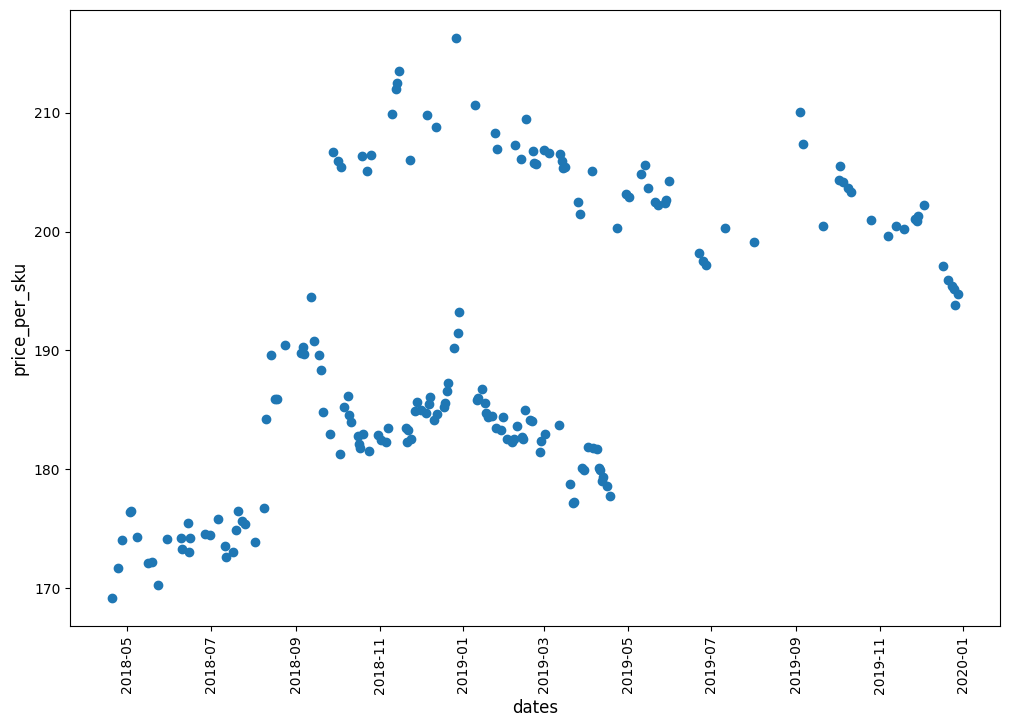

In [23]:
plt.figure(figsize=(12, 8))
plt.scatter(x='dates', y='price_per_sku', data=ZX10208_df)
plt.ylabel('price_per_sku', fontsize=12)
plt.xlabel('dates', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [24]:
# week nonth and year
ZX10208_df['week_num'] = ZX10208_df.dates.dt.isocalendar().week
ZX10208_df['year'] = ZX10208_df.dates.dt.year
ZX10208_df['months'] = ZX10208_df.dates.dt.month
ZX10208_df['year_week'] = ZX10208_df['year'].astype(str) + '_' + ZX10208_df['week_num'].astype(str)

In [25]:
ZX10208_df.head()

,dates,SKU,price_per_sku,num_purchases,week_num,year,months,year_week
0,2018-04-20,59567,169.19,3,16,2018,4,2018_16
1,2018-04-24,59567,171.71,3,17,2018,4,2018_17
2,2018-04-27,59567,174.04,3,17,2018,4,2018_17
3,2018-04-30,59567,NaN,1,18,2018,4,2018_18
4,2018-05-03,59567,176.38,2,18,2018,5,2018_18


In [26]:
ZX10208_gr = ZX10208_df.groupby(['year_week', 'SKU']).price_per_sku.mean().reset_index()

In [27]:
ZX10208_gr = ZX10208_df.rename(columns={'price_per_sku': 'mean_per_week'})

In [28]:
ZX10208_df

,dates,SKU,price_per_sku,num_purchases,week_num,year,months,year_week
0,2018-04-20,59567,169.19,3,16,2018,4,2018_16
1,2018-04-24,59567,171.71,3,17,2018,4,2018_17
2,2018-04-27,59567,174.04,3,17,2018,4,2018_17
3,2018-04-30,59567,NaN,1,18,2018,4,2018_18
4,2018-05-03,59567,176.38,2,18,2018,5,2018_18
...,...,...,...,...,...,...,...,...
254,2019-12-23,82947,NaN,1,52,2019,12,2019_52
255,2019-12-24,82947,195.46,2,52,2019,12,2019_52
256,2019-12-25,82947,195.21,1,52,2019,12,2019_52
257,2019-12-26,82947,193.79,1,52,2019,12,2019_52


In [29]:
ZX10208_df = ZX10208_df.merge(ZX10208_gr, how='left', on=['year_week', 'SKU'])
ZX10208_df = ZX10208_df.rename(columns={'dates_x': 'dates', 'num_purchases_x':	'num_purchases', 
                                        'week_num_x': 'week_num', 'year_x':	'year', 'months_x': 'months'})
ZX10208_df.drop(columns=['dates_y',	'num_purchases_y', 'week_num_y', 'year_y', 'months_y'], inplace=True)

In [30]:
ZX10208_df

,dates,SKU,price_per_sku,num_purchases,week_num,year,months,year_week,mean_per_week
0,2018-04-20,59567,169.19,3,16,2018,4,2018_16,169.19
1,2018-04-24,59567,171.71,3,17,2018,4,2018_17,171.71
2,2018-04-24,59567,171.71,3,17,2018,4,2018_17,174.04
3,2018-04-27,59567,174.04,3,17,2018,4,2018_17,171.71
4,2018-04-27,59567,174.04,3,17,2018,4,2018_17,174.04
...,...,...,...,...,...,...,...,...,...
802,2019-12-28,82947,194.78,1,52,2019,12,2019_52,NaN
803,2019-12-28,82947,194.78,1,52,2019,12,2019_52,195.46
804,2019-12-28,82947,194.78,1,52,2019,12,2019_52,195.21
805,2019-12-28,82947,194.78,1,52,2019,12,2019_52,193.79


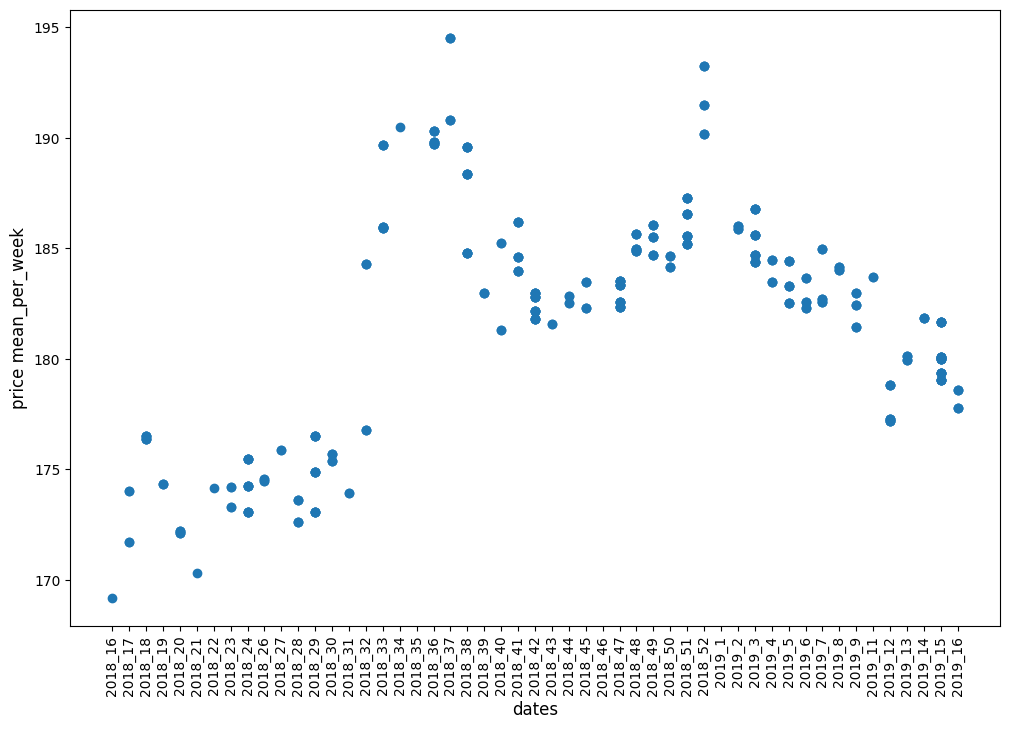

In [31]:
plt.figure(figsize=(12, 8))
plt.scatter(x='year_week', y='mean_per_week', data=ZX10208_df[ZX10208_df.SKU==59567].sort_values('dates'))
plt.ylabel('price mean_per_week', fontsize=12)
plt.xlabel('dates', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [32]:
pivot_t = ZX10208_df.pivot_table(index='dates', columns='SKU', values='price_per_sku')
pivot_t

SKU,59567,82947
dates,,
2018-04-20,169.19,NaN
2018-04-24,171.71,NaN
2018-04-27,174.04,NaN
2018-05-03,176.38,NaN
2018-05-04,176.49,NaN
...,...,...
2019-12-21,NaN,195.96
2019-12-24,NaN,195.46
2019-12-25,NaN,195.21


<Axes: xlabel='dates'>

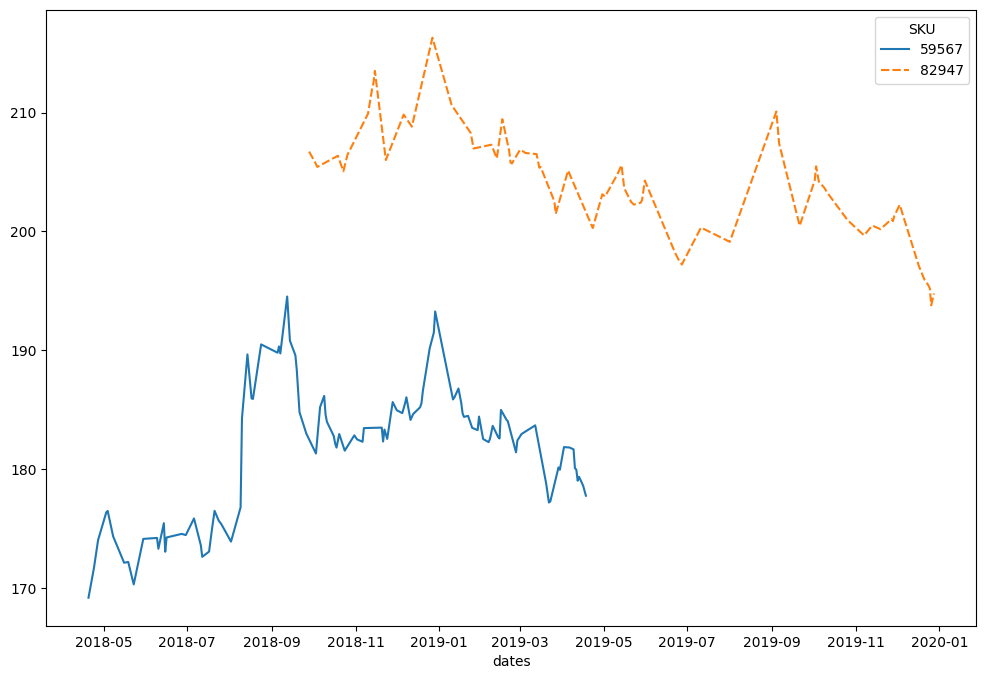

In [33]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=pivot_t)

# 1510001 group

In [34]:
df_1510001 = pd.read_csv('data/less4/lect/1510001_agr.csv')
df_1510001

,dates,SKU,price_per_sku,num_purchases
0,2018-08-02,39665,85.940,1
1,2018-08-03,39665,85.940,1
2,2018-08-04,39665,85.940,1
3,2018-08-05,39665,85.940,1
4,2018-08-06,39665,86.038,1
...,...,...,...,...
3935,2019-12-25,36108,80.094,2
3936,2019-12-28,36108,80.094,2
3937,2019-12-29,36108,80.094,1
3938,2019-12-30,36108,76.205,1


In [35]:
df_1510001.dates = pd.to_datetime(df_1510001.dates)
pivot_t = df_1510001.pivot_table(index='dates', columns='SKU', values='price_per_sku')

In [36]:
pivot_t

SKU,27240,27885,34130,36108,39665,40194,45164,48671,49596,59631,63995,70252,70315,72449
dates,,,,,,,,,,,,,,
2018-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.784,NaN,NaN
2018-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.784,NaN,NaN
2018-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.784,NaN,NaN
2018-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.882,NaN,NaN
2018-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.882,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,128.652,NaN,104.536,NaN,95.978,135.931,82.652,152.815,148.536,NaN,138.536,NaN,71.931,156.257
2019-12-28,NaN,NaN,NaN,80.094,95.978,NaN,82.652,152.815,NaN,108.536,138.536,117.815,71.931,156.257
2019-12-29,128.652,NaN,104.536,80.094,95.978,135.931,82.652,NaN,148.536,NaN,138.536,NaN,71.931,156.257


<Axes: xlabel='dates'>

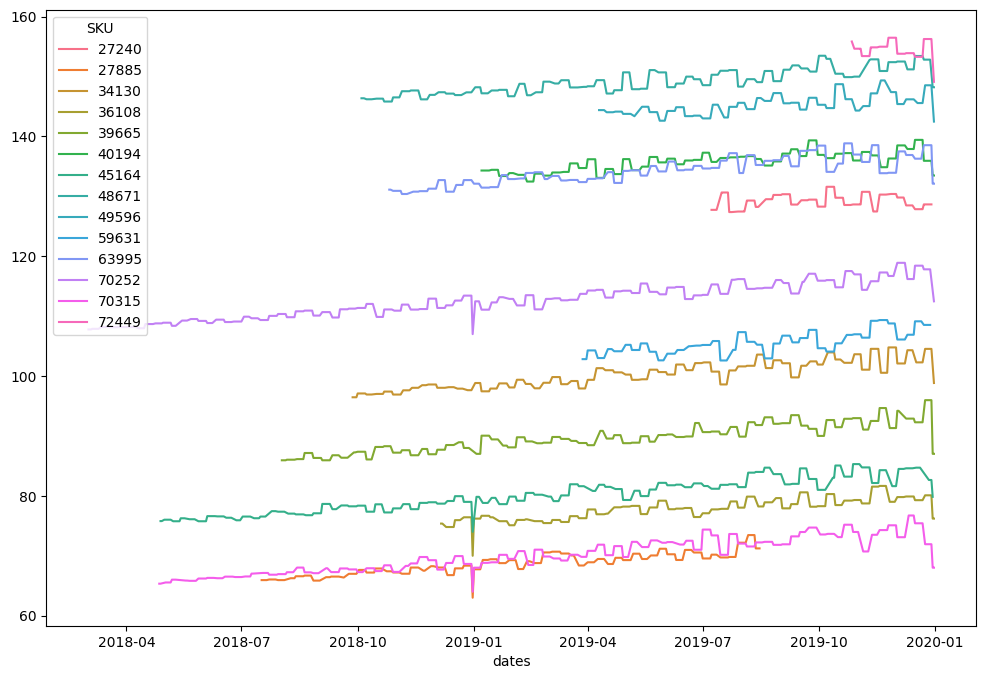

In [37]:
plt.figure(figsize=(12,8))
sns.lineplot(data=pivot_t, dashes=False)

In [38]:
df_1510001.SKU.nunique()

14

In [39]:
df_1510001.SKU.unique()

array([39665, 63995, 70252, 34130, 70315, 27885, 59631, 48671, 72449,
       49596, 27240, 45164, 40194, 36108])

In [41]:
df_1510001[df_1510001.SKU == 39665].num_purchases.describe()

count    354.000000
mean       1.519774
std        0.694702
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: num_purchases, dtype: float64

<Axes: xlabel='num_purchases', ylabel='price_per_sku'>

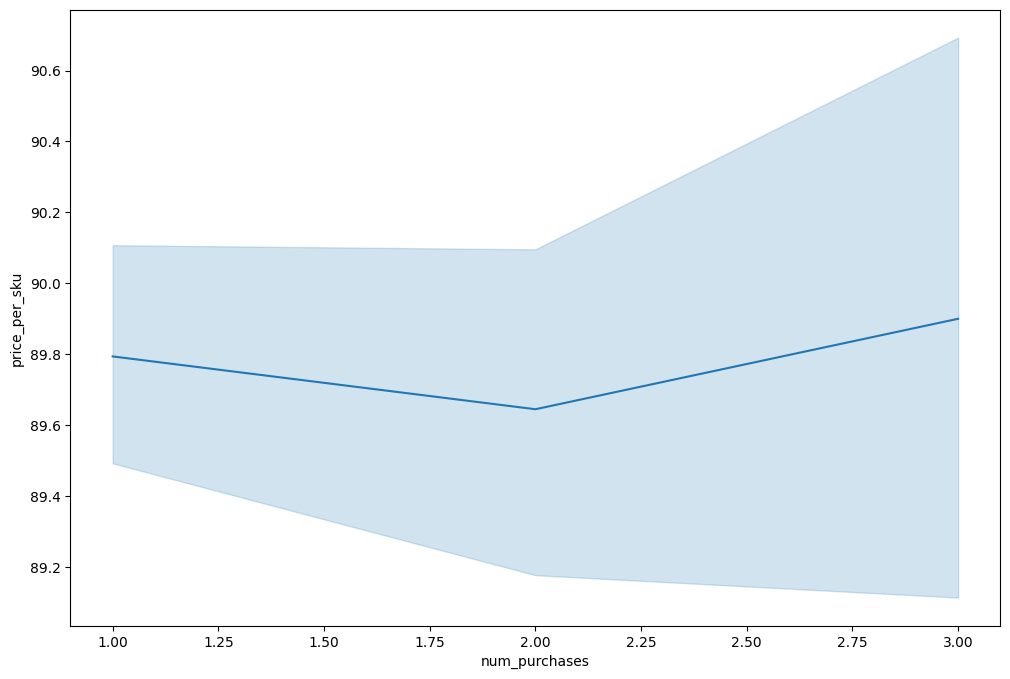

In [43]:
plt.figure(figsize=(12,8))
sns.lineplot(x=df_1510001[df_1510001.SKU==39665].num_purchases, y=df_1510001[df_1510001.SKU==39665].price_per_sku, dashes=False)

# 1510002 group

In [44]:
df_1510002 = pd.read_csv('data/less4/lect/1510002_agr.csv')
df_1510002.dates = pd.to_datetime(df_1510002.dates)

In [45]:
pivot_t = df_1510002.pivot_table(index='dates', columns='SKU', values='num_purchases')
pivot_t

SKU,10334,17812,36096,38767,43678,57561,64619,68211,69997,72784,83329,90611,98255
dates,,,,,,,,,,,,,
2018-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
2018-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
2018-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN
2018-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN
2018-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,9.0,3.0,13.0,NaN,9.0,NaN,4.0,NaN,NaN,7.0,9.0,NaN,NaN
2019-12-28,9.0,4.0,13.0,8.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2019-12-29,8.0,NaN,14.0,9.0,NaN,NaN,4.0,NaN,NaN,NaN,9.0,5.0,NaN


<Axes: xlabel='dates'>

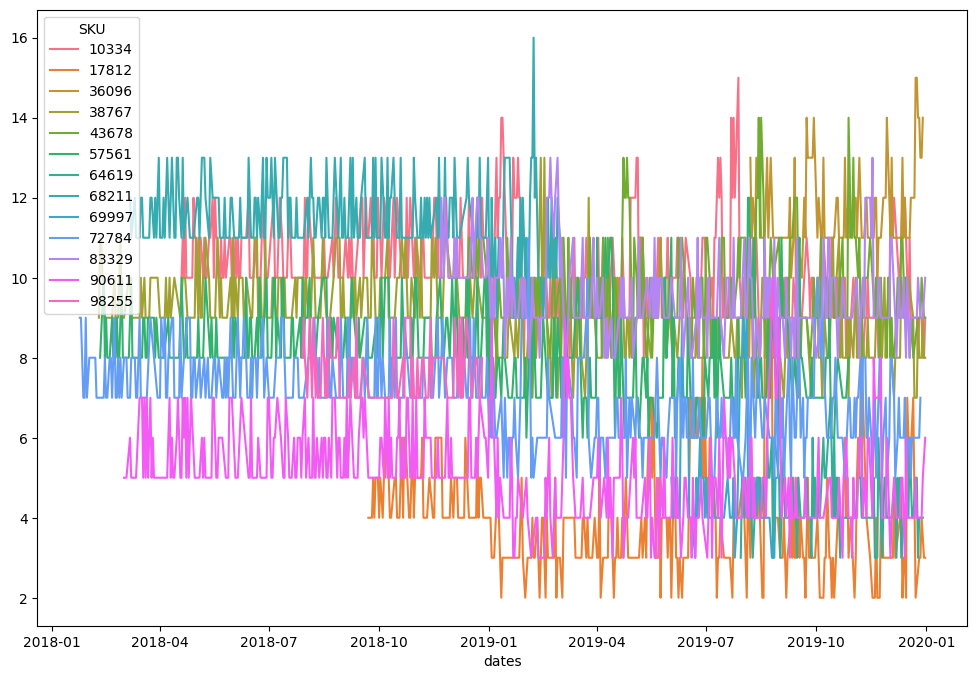

In [46]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=pivot_t, dashes=False)

In [47]:
promo_df = pd.read_csv('data/less4/lect/promo_1510002.csv')
promo_df

,year,week_num,SKU,discount
0,2019,1,90611,0.90
1,2019,2,10334,0.90
2,2019,3,68211,0.90
3,2019,4,10334,0.90
4,2019,5,72784,0.80
5,2019,6,68211,0.90
6,2019,7,38767,0.90
7,2019,8,83329,0.90
8,2019,9,83329,0.95
9,2019,10,90611,0.90


In [48]:
promo_df.discount = 1 - promo_df.discount

In [49]:
df_1510002['year'] = df_1510002.dates.dt.year
df_1510002['week_num'] = df_1510002.dates.dt.isocalendar().week
df_1510002 = df_1510002[df_1510002.dates >= pd.to_datetime('2019-01-01')]

In [50]:
df_72784 = df_1510002[df_1510002.SKU==72784]

In [51]:
df_72784.groupby(['year', 'week_num']).num_purchases.max().reset_index()

,year,week_num,num_purchases
0,2019,1,8
1,2019,2,7
2,2019,3,7
3,2019,4,7
4,2019,5,11
5,2019,6,6
6,2019,7,6
7,2019,8,8
8,2019,9,8
9,2019,10,8


In [52]:
df_1510002 = df_1510002.merge(promo_df, how='left', on=['SKU', 'year', 'week_num'])

In [53]:
df_1510002['real_price_per_sku'] = df_1510002.price_per_sku * (1 + df_1510002.discount)

In [54]:
df_1510002[~df_1510002.discount.isnull()]

,dates,SKU,price_per_sku,num_purchases,year,week_num,discount,real_price_per_sku
0,2019-01-01,90611,79.5420,7,2019,1,0.1,87.49620
13,2019-01-02,90611,79.5420,7,2019,1,0.1,87.49620
20,2019-01-03,90611,79.5420,9,2019,1,0.1,87.49620
27,2019-01-04,90611,79.5420,6,2019,1,0.1,87.49620
35,2019-01-05,90611,79.5420,6,2019,1,0.1,87.49620
...,...,...,...,...,...,...,...,...
2285,2019-12-26,36096,119.3868,14,2019,52,0.1,131.32548
2298,2019-12-27,36096,119.3868,13,2019,52,0.1,131.32548
2299,2019-12-28,36096,119.3868,13,2019,52,0.1,131.32548
2305,2019-12-29,36096,119.3868,14,2019,52,0.1,131.32548


# 1510003 group

In [55]:
df_1 = pd.read_csv('data/less4/lect/1510003_agr.csv')
df_1

,dates,SKU,price_per_sku,num_purchases
0,2018-11-17,54404,80.095,11
1,2018-11-18,54404,80.095,12
2,2018-11-19,54404,81.796,10
3,2018-11-20,54404,81.796,11
4,2018-11-21,54404,81.796,10
...,...,...,...,...
2846,2019-12-27,49661,165.978,10
2847,2019-12-28,49661,165.978,9
2848,2019-12-29,49661,165.978,10
2849,2019-12-30,49661,159.205,8


In [56]:
conc_df = pd.read_csv('data/less4/lect/conc_df.csv')
conc_df

,SKU,year,week_num,ret_net_code,price_per_sku
0,84395,2019,18,1,164.69400
1,84395,2019,18,2,164.69400
2,84395,2019,18,3,134.50010
3,84395,2019,22,1,165.19800
4,84395,2019,22,2,136.28835
...,...,...,...,...,...
3004,89272,2019,18,2,133.93820
3005,89272,2019,18,3,121.76200
3006,80308,2019,47,1,115.77984
3007,80308,2019,47,2,118.19192


In [57]:
df_1[df_1.SKU.isin(conc_df.SKU.unique())]

,dates,SKU,price_per_sku,num_purchases
0,2018-11-17,54404,80.095,11
1,2018-11-18,54404,80.095,12
2,2018-11-19,54404,81.796,10
3,2018-11-20,54404,81.796,11
4,2018-11-21,54404,81.796,10
...,...,...,...,...
2846,2019-12-27,49661,165.978,10
2847,2019-12-28,49661,165.978,9
2848,2019-12-29,49661,165.978,10
2849,2019-12-30,49661,159.205,8


In [58]:
df_1.dates = pd.to_datetime(df_1.dates)

In [59]:
df_1['year'] = df_1.dates.dt.year
df_1['week_num'] = df_1.dates.dt.isocalendar().week

In [61]:
conc_aggr = conc_df.groupby(['SKU', 'year', 'week_num']).price_per_sku.agg(['min', 'max']).reset_index()

In [62]:
df_1 = df_1.merge(conc_aggr, how='left', on=['SKU', 'year', 'week_num'])

In [63]:
df_80308 = df_1[df_1.SKU==80308]
df_80308

,dates,SKU,price_per_sku,num_purchases,year,week_num,min,max
853,2018-07-17,80308,113.940,8,2018,29,NaN,NaN
854,2018-07-18,80308,113.940,8,2018,29,NaN,NaN
855,2018-07-20,80308,113.940,8,2018,29,NaN,NaN
856,2018-07-21,80308,113.940,7,2018,29,NaN,NaN
857,2018-07-22,80308,113.940,8,2018,29,NaN,NaN
...,...,...,...,...,...,...,...,...
1235,2019-12-27,80308,122.536,10,2019,52,122.536,147.0432
1236,2019-12-28,80308,122.536,9,2019,52,122.536,147.0432
1237,2019-12-29,80308,122.536,9,2019,52,122.536,147.0432
1238,2019-12-30,80308,116.475,7,2019,1,111.816,128.1225


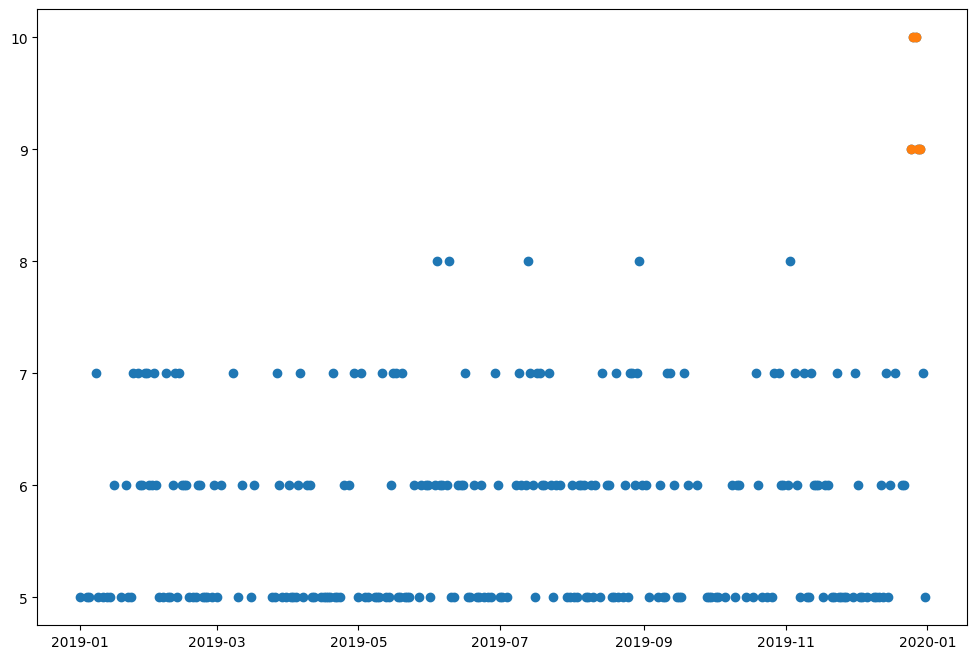

In [68]:
plt.figure(figsize=(12,8))
plt.scatter(x = df_80308[df_80308.price_per_sku >= df_80308['min']].dates, y =df_80308[df_80308.price_per_sku >= df_80308['min']].num_purchases)
plt.scatter(x =df_80308[df_80308.price_per_sku <= df_80308['min']].dates, y=df_80308[df_80308.price_per_sku <= df_80308['min']].num_purchases)